![image of tesla superchargers](images/tesla-supercharger.png)
# Code Louisville - January 2021
## Data Science with Python - Tesla Superchargers Project

This notebook will analyze the Tesla Supercharging Network. This is a network of electric vehicle charging sites located throughout the world. These chargers are primarily used by Tesla vehicles. A typical Tesla has a range of 250-350 miles. To travel, you will need to stop and charge. 

A typical Level 2 home charger will take 10-12 hours to completely recharge a car. Obviously this is too long to wait if you are on a trip or vacation. These Superchargers are also known as Level 3 DC fast chargers. They can charge a Tesla from 0-75% in around 20 minutes. This enables Teslas to be more easily driven over long distances.  

There are approximately 1000 sites and 10,000 chargers in the US at the time this readme file was created. More are being installed every month. 

### Questions

* What are the top ten sites by state?
* What are the top ten individual chargers by state?
* What are the top ten states with the the fewest people per charger **the best**?
* How are the sites distributed across the U.S.?
* Compare the output power (150Kw, 250Kw, etc) that determines how long a vehicle has to stay to charge.
* Has the Supercharger network kept up with the production and delivery of new Teslas?
* Are Superchargers distributed equally when factoring population?
* Using a machine learning model, can I predict the size of the Supercharger site based on the features contained int the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import Markdown, display, HTML

# general settings
tesla_red = '#e82127'

## Tesla Charger Data 

The primary data for this notebook comes from Tesla itself. On their website, is the entire dataset of chargers. It is a json file that contains information on all chargers in the world. It includes Superchargers and destination chargers. It has information on current and future expansion.

I have downloaded the json file locally, but the data should be available at the following url.

[Download Tesla All Locations](https://www.tesla.com/all-locations)

In [2]:
# read the tesla json
sites = pd.read_json('input/tesla-all-locations.json')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#print(f"Columns List: {sites.columns}")
print(f"The file contains {sites.shape[0]} rows and {sites.shape[1]} columns ")

# Export the raw data to csv
sites.to_csv('output/all-chargers.csv', index=False)

The file contains 16521 rows and 38 columns 


In [3]:
# It would be fun to produce some statistics about the original data set. I will start with these
# Number of charger sites, top ten countries, # of destination chargers vs. superchargers. 

q = "location_type.str.contains('supercharger', regex = False)" 
superchargers_count = len(sites.query(q))
q = "location_type.str.contains('destination charger', regex = False)" 
destination_chargers_count = len(sites.query(q))

total_chargers_count = superchargers_count + destination_chargers_count 

country_count = len(sites.country.value_counts())

display(HTML(f'''
<style>
tr {{text-align: center}}
tr.count td {{background-color: #e82127; font-size: 22px; padding: 10px; border: 1px solid black; border-collapse: collapse; width: 150px;}}
</style>
<h2>Sites Dataframe Stats</h2>
<table border='1'>
    <tr><th>Total Charger Sites</th><th>Supercharger Sites</th><th>Destination Charger Sites</th><th>Country Count</th></tr>
    <tr class=count><td class=count>{total_chargers_count}</td><td>{superchargers_count}</td><td>{destination_chargers_count}</td><td>{country_count}</td></tr>
</table>
'''))

Total Charger Sites,Supercharger Sites,Destination Charger Sites,Country Count
16023,3819,12204,60


In [4]:
sites.head()

,sl_translate,address_line_1,address_line_2,address_notes,address,amenities,baidu_lat,baidu_lng,chargers,city,common_name,country,destination_charger_logo,destination_website,directions_link,emails,geocode,hours,is_gallery,kiosk_pin_x,kiosk_pin_y,kiosk_zoom_pin_x,kiosk_zoom_pin_y,latitude,location_id,location_type,longitude,nid,open_soon,path,postal_code,province_state,region,sales_phone,sales_representative,sub_region,title,trt_id
0,sl_all,395 Santa Monica Place #120,,,"395 Santa Monica Place #120\r\nSanta Monica, C...",,0.0,0.0,,Santa Monica,,United States,,,"https://maps.google.com/maps?daddr=34.013819,-...",[],watacgtttgccttggttgt,"<p><strong>Email</strong><br/><a href=""mailto:...",False,453,441,702,490,34.013819,santamonicaplace,[store],-118.494028,6290,0,/santamonicaplace,90401,CA,north_america,"[{'label': 'Store', 'number': '(310) 395-8333'...",False,California,Santa Monica Place,3631
1,sl_all,Am Waizenhof 12,,,Euro Rastpark Aichstetten\r\nAm Waizenhof 12 A...,<p><strong>Restrooms</strong><br />Euro Rastpa...,0.0,0.0,<p><strong>Charging</strong><br />8 Supercharg...,Aichstetten,Euro Rastpark Aichstetten,Germany,,,"https://maps.google.com/maps?daddr=47.880344,1...",[],eaaggtctggtgaatttcga,,False,0,0,0,0,47.880344,aichstettensupercharger,"[supercharger, standard charger]",10.040342,6292,0,/aichstettensupercharger,88317,,europe,"[{'label': 'Roadside Assistance', 'number': ' ...",False,Germany,Aichstetten Supercharger,0
2,sl_all,131 Colonie Center,,,Colonie Center\r\n131 Colonie Center\r\nAlbany...,<p><strong>Restrooms</strong><br />Inside Colo...,0.0,0.0,<p><strong>Charging</strong><br />6 Supercharg...,Albany,Colonie Center,United States,,,"https://maps.google.com/maps?daddr=42.710356,-...",[],wcgacacttagaaaactgcg,,False,0,0,0,0,42.710356,albanysupercharger,"[supercharger, standard charger]",-73.819109,6293,0,/albanysupercharger,12205,NY,north_america,"[{'label': 'Roadside Assistance', 'number': '(...",False,New York,"Albany, NY Supercharger",0
3,sl_all,811 E Plaza St,,,AmericInn Lodge & Suites Albert Lea,<p><strong>Restrooms</strong><br />AmericInn (...,0.0,0.0,<p><strong>Charging</strong><br />4 Supercharg...,Albert Lea,AmericInn Lodge & Suites Albert Lea,United States,,,"https://maps.google.com/maps?daddr=43.68606,-9...",[],watcccactggcttggcatt,,False,0,0,0,0,43.686060,albertleasupercharger,"[supercharger, standard charger]",-93.357721,6294,0,/albertleasupercharger,56007,MN,north_america,"[{'label': 'Roadside Assistance', 'number': '(...",False,Minnesota,"Albert Lea, MN Supercharger",0
4,sl_all,3855 Indiana 127,,,"Ramada Angola\r\n3855 Indiana 127\r\nAngola, I...",<p><strong>Restrooms</strong><br />Ramada Ango...,0.0,0.0,<p><strong>Charging</strong><br />6 Supercharg...,Angola,Ramada Angola,United States,,,"https://maps.google.com/maps?daddr=41.699048,-...",[],wcgaaatccgagtccaggta,,False,0,0,0,0,41.699048,angolasupercharger,"[supercharger, standard charger]",-85.000326,6298,0,/angolasupercharger,46703,IN,north_america,"[{'label': 'Roadside Assistance', 'number': '(...",False,Indiana,"Angola, IN Supercharger",0


# Data Dictionary

This data dictionary does not come from Tesla, since the json file on their site is not a documented file by Tesla.  This is just info I learned while analyzing the data. 

## Fields I Added

* **zip_population** - population of zip code estimated 
* **state_population** - 2019 State Population Estimate
* **average_income** - based on 2018 tax records
* **site_size** - size of the site (High, Medium, Low) based on the number of chargers.

## Address Info

* **address_line_1**
* **address_line_2**
* **address_notes**
* **address**
* **city**
* **province_state** - state for US
* **postal_code** - zip code for US
* **country**
* **region** - large region like north america, europe, etc
* **sub_region** - smaller region like kentucky, united kingdom, etc.
* **state_name** - proper full state name

## Geographic Data

* **latitude** - latitude of the site
* **longitude** - longitude of the site
* **baidu_lat** - unknown seems to always be 0.0
* **baidu_lng** - unknown seems to always be 0.0
* **geocode** - unknown code (maybe Tesla specific)


## Site Details
* **amenities** - info on food, restrooms, shoping, etc. 
* **chargers** - html markup that contains the information about the charging site. This field contains the power level, number of chargers and available hours. 
* **common_name** - Human readable name of the local area
* **date_opened** - This comes from the supercharge-info json not the tesla json file. It displays the date the site was opened. This data is supplied by user on the supercharge.info site. 
* **hours** - hours of operation. This seems to be reserved to stores, service and delivery. 
* **emails** - seems to be blank
* **location_id** - Unique identifier of the location.
  * This same location_id id found in the supercharge.info json file
* **location_type** - List the type of loctaion. Supercharger, Destination Charger, Store, Service, Delivery
* **num_of_chargers** - number of individual chargers per site
* **open_soon** - indicates if the location is opening soon.
* **power** - power rating for charger (150Kw, 250Kw) Determines charging speed
* **path** - path on the tesla.com site for this location.
* **title** - name of the supercharger site
* **site_size** - size of the site (High, Medium, Low) based on the number of chargers.

## Destination Charger Info

These destination chargers are located at hotels. They offer lower power connections for overnight charging. They are in the dataset, but are not the focus of this analysis.

* **destination_charger_logo**
* **destination_website** - destination charger info, usually the hote's website
* **directions_link** - google maps link 

## Store Related
* **is_gallery**
* **kiosk_pin_x**
* **kiosk_pin_y**
* **kiosk_zoom_pin_x**
* **kiosk_zoom_pin_y**
* **sales_phone**
* **sales_representative**

## Misc
* **nid** - unknown, possible a tesla specific identifier
* **trt_id** - unknown


# Extract data from the chargers field HTML

I need to extract some data from a html markup in the chargers column. Specifically I need to extract the number of chargers per site and the power rating (150KW, 250KW)

In [5]:
# add the number of chargers from the html, using regular expresions, this is searching
# for at least 1 digit (0-9) folowed by a space and the word 'Superchargers'. The () around
# the \d+ is a capture group. It will find the pattern but only return the part in the ()
sites['num_of_chargers'] = sites['chargers'].str.extract(r'(\d+) Superchargers', flags = re.IGNORECASE)

# add the power rate from the html markup
sites['power'] = sites['chargers'].str.extract(r'(\d+)KW', flags = re.IGNORECASE)

# change the data type of the number columns to support math later
sites = sites.astype({'num_of_chargers' : 'float64', 'power' : 'float64'})

sites.head()

,sl_translate,address_line_1,address_line_2,address_notes,address,amenities,baidu_lat,baidu_lng,chargers,city,common_name,country,destination_charger_logo,destination_website,directions_link,emails,geocode,hours,is_gallery,kiosk_pin_x,kiosk_pin_y,kiosk_zoom_pin_x,kiosk_zoom_pin_y,latitude,location_id,location_type,longitude,nid,open_soon,path,postal_code,province_state,region,sales_phone,sales_representative,sub_region,title,trt_id,num_of_chargers,power
0,sl_all,395 Santa Monica Place #120,,,"395 Santa Monica Place #120\r\nSanta Monica, C...",,0.0,0.0,,Santa Monica,,United States,,,"https://maps.google.com/maps?daddr=34.013819,-...",[],watacgtttgccttggttgt,"<p><strong>Email</strong><br/><a href=""mailto:...",False,453,441,702,490,34.013819,santamonicaplace,[store],-118.494028,6290,0,/santamonicaplace,90401,CA,north_america,"[{'label': 'Store', 'number': '(310) 395-8333'...",False,California,Santa Monica Place,3631,NaN,NaN
1,sl_all,Am Waizenhof 12,,,Euro Rastpark Aichstetten\r\nAm Waizenhof 12 A...,<p><strong>Restrooms</strong><br />Euro Rastpa...,0.0,0.0,<p><strong>Charging</strong><br />8 Supercharg...,Aichstetten,Euro Rastpark Aichstetten,Germany,,,"https://maps.google.com/maps?daddr=47.880344,1...",[],eaaggtctggtgaatttcga,,False,0,0,0,0,47.880344,aichstettensupercharger,"[supercharger, standard charger]",10.040342,6292,0,/aichstettensupercharger,88317,,europe,"[{'label': 'Roadside Assistance', 'number': ' ...",False,Germany,Aichstetten Supercharger,0,8.0,150.0
2,sl_all,131 Colonie Center,,,Colonie Center\r\n131 Colonie Center\r\nAlbany...,<p><strong>Restrooms</strong><br />Inside Colo...,0.0,0.0,<p><strong>Charging</strong><br />6 Supercharg...,Albany,Colonie Center,United States,,,"https://maps.google.com/maps?daddr=42.710356,-...",[],wcgacacttagaaaactgcg,,False,0,0,0,0,42.710356,albanysupercharger,"[supercharger, standard charger]",-73.819109,6293,0,/albanysupercharger,12205,NY,north_america,"[{'label': 'Roadside Assistance', 'number': '(...",False,New York,"Albany, NY Supercharger",0,6.0,150.0
3,sl_all,811 E Plaza St,,,AmericInn Lodge & Suites Albert Lea,<p><strong>Restrooms</strong><br />AmericInn (...,0.0,0.0,<p><strong>Charging</strong><br />4 Supercharg...,Albert Lea,AmericInn Lodge & Suites Albert Lea,United States,,,"https://maps.google.com/maps?daddr=43.68606,-9...",[],watcccactggcttggcatt,,False,0,0,0,0,43.686060,albertleasupercharger,"[supercharger, standard charger]",-93.357721,6294,0,/albertleasupercharger,56007,MN,north_america,"[{'label': 'Roadside Assistance', 'number': '(...",False,Minnesota,"Albert Lea, MN Supercharger",0,4.0,150.0
4,sl_all,3855 Indiana 127,,,"Ramada Angola\r\n3855 Indiana 127\r\nAngola, I...",<p><strong>Restrooms</strong><br />Ramada Ango...,0.0,0.0,<p><strong>Charging</strong><br />6 Supercharg...,Angola,Ramada Angola,United States,,,"https://maps.google.com/maps?daddr=41.699048,-...",[],wcgaaatccgagtccaggta,,False,0,0,0,0,41.699048,angolasupercharger,"[supercharger, standard charger]",-85.000326,6298,0,/angolasupercharger,46703,IN,north_america,"[{'label': 'Roadside Assistance', 'number': '(...",False,Indiana,"Angola, IN Supercharger",0,6.0,150.0


# How many sites and chargers exist by country? 

This number is a little hard to read. Destination chargers do not report the number of chargers. There are also upcoming sites that don't indicated their charger count. 

In [6]:
# count 
site_counts = sites.groupby('country') \
    .agg(charger_count=('num_of_chargers', 'sum'),
         site_count=('country', 'count'))
# Sort and limit to 10
site_counts = site_counts.sort_values(by=['charger_count'], ascending = False)[:10]

# Grand Total
grand_total = sites.agg(charger_count=('num_of_chargers', 'sum'),
         site_count=('num_of_chargers', 'count'))
all_chargers = grand_total['num_of_chargers']['charger_count']
all_sites = grand_total['num_of_chargers']['site_count']

# append the grand total to the df
site_counts.loc['All Countries',:]=[all_chargers, all_sites]
site_counts = site_counts.astype(int) # make everything integers
print('Top Ten Countries with a Grand Total')
site_counts

Top Ten Countries with a Grand Total


,charger_count,site_count
country,,
United States,9770,5399
Canada,1056,706
Norway,996,270
Germany,784,948
France,746,853
United Kingdom,608,678
Netherlands,500,154
Sweden,468,240
Italy,316,816


# United States and Only Superchargers

In [7]:
# I want just USA sites and only superchargers. There are also destination chargers at hotels
q = "country == 'United States' & location_type.str.contains('supercharger', regex = False)" 

us_sites = sites.query(q)

us_sites = us_sites[['title', 'location_id', 'nid', 
                           'address_line_1', 'city', 'province_state', 'postal_code',
                           'chargers', 'common_name', 'open_soon',
                           'latitude', 'longitude', 'location_type','num_of_chargers','power']]

# rename some columns
us_sites.rename(columns = {"province_state": "state_code", "postal_code": "zip_code", "address_line_1" : "address"}, inplace = True)

# zip codes
us_sites['zip_code'] = us_sites['zip_code'].str[:5]
us_sites = us_sites.astype({'zip_code': 'str'})

print(f"The US only dataframe contains {us_sites.shape[0]} rows and {us_sites.shape[1]} columns ")
us_sites.head()

The US only dataframe contains 1354 rows and 15 columns 


,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power
2,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6.0,150.0
3,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]",4.0,150.0
4,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]",6.0,150.0
6,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]",8.0,150.0
11,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]",8.0,150.0


## Population by Zip Code

Up-to-date: Data updated as of February 24, 2021.  https://simplemaps.com/data/us-zips

In [8]:
pop = pd.read_csv('input/uszips.csv', header=0, usecols=['zip','population'])
pop.columns = ['zip_code','zip_population']
pop = pop.astype({'zip_code': 'str'})

pop.dtypes
# merge into the us_sites frame
us_sites = pd.merge(us_sites, pop, how = 'left', on = 'zip_code')

us_sites.head()

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,zip_population
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6.0,150.0,26941.0
1,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]",4.0,150.0,21075.0
2,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]",6.0,150.0,18264.0
3,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]",8.0,150.0,33466.0
4,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]",8.0,150.0,3484.0


# Average income

Add average income by zipcode to the dataset. Based on 2018 tax return data. 

https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2018-zip-code-data-soi

In [9]:
income = pd.read_csv('input/18zpallnoagi.csv', header=0, usecols=['ZIPCODE','A00100','N02650'])
income.columns = ['zip_code','agi_per_1000','returns_with_income']
income['average_income'] = income.agi_per_1000 * 1000 / income.returns_with_income

# the type for zip_code said object, but I found on stackoverflow that I had to set both to 
# str before the merge will work. It was just returning NaN for the average income. Seems bad
# that dtypes returned object before and after, but after it worked 
income = income.astype({'zip_code': 'str'})

# merge into the us_sites frame
us_sites = pd.merge(us_sites, income[['zip_code', 'average_income']], how = 'left', on = 'zip_code')
us_sites.head()

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,zip_population,average_income
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6.0,150.0,26941.0,60821.718854
1,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]",4.0,150.0,21075.0,55718.081918
2,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]",6.0,150.0,18264.0,60428.121354
3,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]",8.0,150.0,33466.0,77749.554489
4,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]",8.0,150.0,3484.0,52444.378698


## Open Date

The json file on tesla.com does not include the opening date of the each site. The website supercharge.info contains additional data about each site. This data is maintained by users submitting their experiences to the site. It is not affiliated with Tesla.

Luckily the location_id field in the supercharge-info matches the location_id in the tesla data. I have copied this json file locally, but the newest version should be found at:

## Links
* [All Changes](https://supercharge.info/service/supercharge/allChanges)
* [All Sites](https://supercharge.info/service/supercharge/allSites)

There are two json files. I am using the allSites file. I need to do more research to find out the differences.

In [10]:
# get the location_id, open date from the supercharge.info to merge with the base tesla data

open_info = pd.read_json('input/supercharge-info-allSites.json')
open_info = open_info[['id', 'locationId', 'dateOpened']]

# rename
open_info.rename(columns = {"locationId": "location_id", "dateOpened": "date_opened"}, inplace = True)

open_info['date_opened'] = pd.to_datetime(open_info['date_opened'])
print(f"The supercharge-info data contains {open_info.shape[0]} rows and {open_info.shape[1]} columns ")
#print(open_info.shape)
#open_info.dtypes

# merge the two datasets to add open date to the data
us_sites = pd.merge(us_sites, open_info, how = 'left', on = 'location_id')
#us_sites.info()

us_sites.head()

The supercharge-info data contains 2906 rows and 3 columns 


,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,zip_population,average_income,id,date_opened
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6.0,150.0,26941.0,60821.718854,160.0,2014-04-30
1,"Albert Lea, MN Supercharger",albertleasupercharger,6294,811 E Plaza St,Albert Lea,MN,56007,<p><strong>Charging</strong><br />4 Supercharg...,AmericInn Lodge & Suites Albert Lea,0,43.686060,-93.357721,"[supercharger, standard charger]",4.0,150.0,21075.0,55718.081918,152.0,2014-01-15
2,"Angola, IN Supercharger",angolasupercharger,6298,3855 Indiana 127,Angola,IN,46703,<p><strong>Charging</strong><br />6 Supercharg...,Ramada Angola,0,41.699048,-85.000326,"[supercharger, standard charger]",6.0,150.0,18264.0,60428.121354,147.0,2013-12-09
3,"Atascadero, CA Supercharger",atascaderosupercharger,6300,6950 El Camino Real,Atascadero,CA,93422,<p><strong>Charging</strong><br />8 Supercharg...,Rabobank,0,35.486585,-120.666378,"[supercharger, standard charger]",8.0,150.0,33466.0,77749.554489,108.0,2013-07-03
4,"Beaver, UT Supercharger",beaversupercharger,6308,Littlefield Interchange,Beaver,UT,84713,<p><strong>Charging</strong><br/>8 Supercharge...,Beaver Valley Chevron,0,38.249149,-112.652524,"[supercharger, standard charger]",8.0,150.0,3484.0,52444.378698,187.0,2014-04-14


## Add State Fullname for display in visualizations 

In [11]:
# read the csv into a dict for use in replace map
state_codes = pd.read_csv('input/us_state_codes.csv')
state_codes.head()

us_sites = pd.merge(us_sites, state_codes, how = 'inner', on = 'state_code')
us_sites.head()

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,zip_population,average_income,id,date_opened,state_name
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6.0,150.0,26941.0,60821.718854,160.0,2014-04-30,New York
1,"JFK - Queens, NY Supercharger",jfksupercharger,6407,150th Ave and 147th St,Queens,NY,11430,<p><strong>Charging</strong><br />4 Supercharg...,JFK Airport Travel Plaza,0,40.663190,-73.793192,"[supercharger, standard charger]",4.0,150.0,206.0,NaN,161.0,2013-12-23,New York
2,Utica Supercharger,uticanysupercharger,7654,50 Auert Ave.,Utica,NY,13501,<p><strong>Charging</strong><br />8 supercharg...,North Utica Shopping Center,0,43.113878,-75.206857,"[supercharger, standard charger]",8.0,150.0,36920.0,40947.297297,545.0,2015-02-11,New York
3,Syracuse Supercharger,syracusesupercharger,9018,441 Electronics Parkway,Liverpool,NY,13088,<p><strong>Charging</strong><br />8 supercharg...,Holiday Inn Syracuse/Liverpool,0,43.102424,-76.187446,"[supercharger, standard charger]",8.0,150.0,21917.0,58462.852405,547.0,2015-04-16,New York
4,Buffalo Supercharger,buffalosupercharger,9563,4455 Transit Road,Buffalo,NY,14221,<p><strong>Charging</strong><br />8 supercharg...,Shops at Main / Transit,0,42.968675,-78.695680,"[supercharger, standard charger]",8.0,150.0,53948.0,101220.906801,415.0,2015-06-11,New York


## State Population (2019)

I want to add state population to the dataset so later on I can normalize the number of sites. 

[Census Data](https://www.census.gov/data/datasets/time-series/demo/popest/2010s-state-total.html#par_textimage_500989927)

In [12]:
# add state population
population = pd.read_csv('input/state_population.csv')

us_sites = pd.merge(us_sites, population, how = 'inner', on = 'state_name')

# change the data type of the number columns to support math later
us_sites = us_sites.astype({'state_population' : 'float64'})
us_sites.head()

,title,location_id,nid,address,city,state_code,zip_code,chargers,common_name,open_soon,latitude,longitude,location_type,num_of_chargers,power,zip_population,average_income,id,date_opened,state_name,state_population
0,"Albany, NY Supercharger",albanysupercharger,6293,131 Colonie Center,Albany,NY,12205,<p><strong>Charging</strong><br />6 Supercharg...,Colonie Center,0,42.710356,-73.819109,"[supercharger, standard charger]",6.0,150.0,26941.0,60821.718854,160.0,2014-04-30,New York,19453561.0
1,"JFK - Queens, NY Supercharger",jfksupercharger,6407,150th Ave and 147th St,Queens,NY,11430,<p><strong>Charging</strong><br />4 Supercharg...,JFK Airport Travel Plaza,0,40.663190,-73.793192,"[supercharger, standard charger]",4.0,150.0,206.0,NaN,161.0,2013-12-23,New York,19453561.0
2,Utica Supercharger,uticanysupercharger,7654,50 Auert Ave.,Utica,NY,13501,<p><strong>Charging</strong><br />8 supercharg...,North Utica Shopping Center,0,43.113878,-75.206857,"[supercharger, standard charger]",8.0,150.0,36920.0,40947.297297,545.0,2015-02-11,New York,19453561.0
3,Syracuse Supercharger,syracusesupercharger,9018,441 Electronics Parkway,Liverpool,NY,13088,<p><strong>Charging</strong><br />8 supercharg...,Holiday Inn Syracuse/Liverpool,0,43.102424,-76.187446,"[supercharger, standard charger]",8.0,150.0,21917.0,58462.852405,547.0,2015-04-16,New York,19453561.0
4,Buffalo Supercharger,buffalosupercharger,9563,4455 Transit Road,Buffalo,NY,14221,<p><strong>Charging</strong><br />8 supercharg...,Shops at Main / Transit,0,42.968675,-78.695680,"[supercharger, standard charger]",8.0,150.0,53948.0,101220.906801,415.0,2015-06-11,New York,19453561.0


## Bin the Number of Chargers

Create BINS bases on the number of chargers. 

| Range | Bin | Title  |
|-------|-----|--------|
| 0-7   |  1  | Low    |
| 8-15  |  2  | Medium |
| 16+   |  3  | High   | 

In [13]:
# get a list of charger counts and how many sites have that number of chargers
#print(us_sites['num_of_chargers'].value_counts().sort_index(ascending=False))

# cut the number of chargers into high, medium and low bins
cut_labels = [1,2,3] #['low', 'medium', 'high']
# range are from 0-7 including 7, 8-15 including 15, 16 or more
cut_bins = [0, 7, 15, 200]
us_sites['site_size'] = pd.cut(us_sites['num_of_chargers'], bins=cut_bins, labels=cut_labels)
#us_sites[['site_size', 'num_of_chargers']].head(100)

## Final US Supercharger Sites Dataframe 

This is the final US Tesla Superchargers Dataframe. It is also exported to csv in the output folder. I am putting this above the open/coming soon so if anyone wants the csv file it will have both. 

In [14]:
# export this final U.S. dataframe
us_sites.to_csv('output/us-superchargers.csv', index=False)

# I only want sites that are open.
us_sites = us_sites[us_sites.open_soon == 0]

# Tesla Vehicles Sold vs. Superchargers Built (by quarter)

How has the Supercharger network kept up with the production of cars? Are there enough chargers for all the new cars built?

Compare the cummulative number of Teslas sold the cummulative number of open Supercharger sites. Compare these by quarter for the United States. This will use the date_opened field from the superchargers.info site. 

Dual axis line chart. One line will be Teslas sold, the other will be the count of superchargers opened. 

In [15]:
# teslas sold by quarter
# https://www.statista.com/statistics/502208/tesla-quarterly-vehicle-deliveries/
# I just manually created a spreadsheet of the data. 
teslas_sold = pd.read_csv('input/tesla-quarterly-sales.csv')

teslas_sold['Quarter'] = pd.to_datetime(teslas_sold['Quarter'])
teslas_sold['year_quarter'] = teslas_sold.Quarter.dt.year + (teslas_sold.Quarter.dt.quarter / 10)
teslas_sold.head()

,Quarter,Sales,year_quarter
0,2015-12-31,17400,2015.4
1,2016-03-31,14800,2016.1
2,2016-06-30,14400,2016.2
3,2016-09-30,24500,2016.3
4,2016-12-31,22200,2016.4


In [16]:
# get a sum by year and quarter, this will line up with the 
# quarterly sales numbers
sites_opened = us_sites[['date_opened', 'num_of_chargers']] \
    .groupby([us_sites.date_opened.dt.year.rename('year'), \
              us_sites.date_opened.dt.quarter.rename('quarter')]).agg('sum')

# I want the year and quarter to be columns not index
sites_opened = sites_opened.reset_index()

# year and quarter as a single field for plotting
# there has to be a better way
sites_opened['year_quarter'] = sites_opened.year + sites_opened.quarter / 10

# merge the 
sold_built = pd.merge(sites_opened, teslas_sold, on='year_quarter', how='inner')

# get a cummulative sum
sold_built['built_cum'] = sold_built['num_of_chargers'].cumsum()
sold_built['sold_cum'] = sold_built['Sales'].cumsum()

built = pd.Series(sold_built['built_cum'].values, index=sold_built['year_quarter'])
sold = pd.Series(sold_built['sold_cum'].values, index=sold_built['year_quarter'])
sold_built.head()
#built.plot.line()
#sold.plot.line()

# export merged sales and site data
sold_built.to_csv('output/teslas-sold-sites-built.csv', index=False)

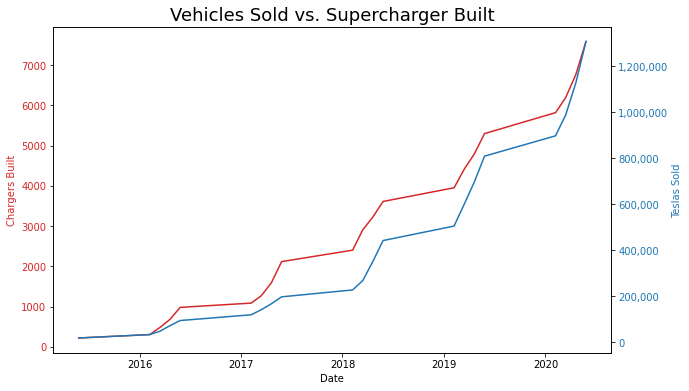

In [17]:
fig, ax1 = plt.subplots(figsize=(10,6))

color = 'tab:red'
ax1.set_title("Vehicles Sold vs. Supercharger Built", fontsize = 18)
ax1.set_xlabel('Date')
ax1.set_ylabel('Chargers Built', color=color)
ax1.plot(sold_built.year_quarter, built, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Teslas Sold', color=color)  # we already handled the x-label with ax1
ax2.plot(sold_built.year_quarter, sold, color=color)
ax2.ticklabel_format(useOffset=False, style='plain')

# all this to get commas in the y-axis. COME ON MAN!
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

## Supercharger Statistics

The following visualizations show the Number of Chargers by State, the Number of Sites by State Fewest Population per Charger

In [18]:
%matplotlib inline

# function for a bar chart
def bar_chart(x, y, x_label, y_label, title, color):

    # make a bar chart
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, zorder=10)
    ax.bar(x, y, color=color)

    # text
    ax.set_title(title, fontsize = 18)
    ax.set_xlabel(x_label, fontsize = 8, fontweight = 'bold')
    ax.set_xticklabels(x, rotation=45)

    ax.set_ylabel(y_label, fontsize = 8, fontweight = 'bold')
    ax.legend(['Count'])

    # totally ripped off, i need to better understand what is happening 
    for i in range(len(y)):
        ax.annotate(str(y[i]), xy=(x[i], y[i]), ha='center', va='bottom', color='black')

    # grids on
    # Don't allow the axis to be on top of your data
    ax.set_axisbelow(True)
    ax.grid(color = 'gray', linestyle = 'solid', alpha = 0.2)

    plt.show()

In [19]:
# count and sum the number of chargers and sites
# average the population
state_counts = us_sites.groupby('state_name') \
    .agg(charger_count=('num_of_chargers', 'sum'),
         site_count=('num_of_chargers', 'count'),
         population=('state_population', 'mean'))

# people per charger
state_counts['pop_per_charger'] = state_counts['population'] / state_counts['charger_count'] 
state_counts = state_counts.astype(int) # make everything integers
state_counts.head()

,charger_count,site_count,population,pop_per_charger
state_name,,,,
Alabama,56,7,4903185,87556
Arizona,228,22,7278717,31924
Arkansas,26,3,3017804,116069
California,2923,202,39512223,13517
Colorado,225,26,5758736,25594


<ipython-input-18-4b8bdb025340>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


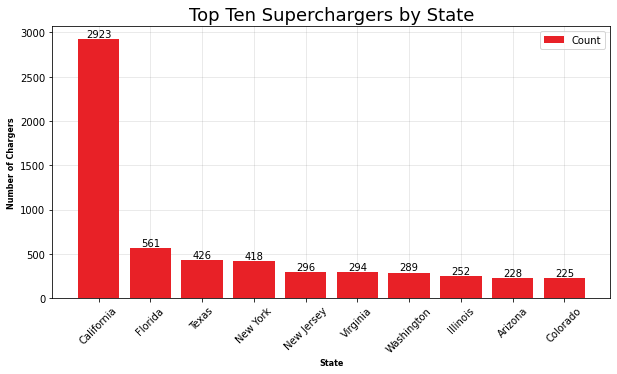

In [20]:
# Chargers 
top_ten_chargers = state_counts.sort_values(by=['charger_count'], ascending = False)[:10]

# get the data in a series for plotting
states = top_ten_chargers.index.values.tolist() 
count = top_ten_chargers.charger_count.values.tolist()

# plot it
bar_chart(states, count, 'State', 'Number of Chargers', 'Top Ten Superchargers by State', tesla_red)

<ipython-input-18-4b8bdb025340>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


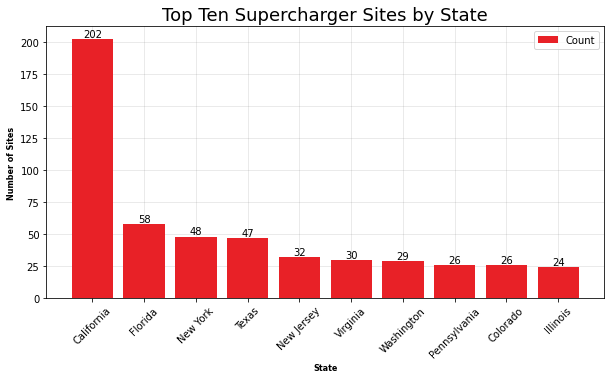

In [21]:
# Sites 
top_ten_sites = state_counts.sort_values(by=['site_count'], ascending = False)[:10]

# get the data in a series for plotting
states = top_ten_sites.index.values.tolist() 
count = top_ten_sites.site_count.values.tolist()

# plot it
bar_chart(states, count, 'State', 'Number of Sites', 'Top Ten Supercharger Sites by State', tesla_red)

<ipython-input-18-4b8bdb025340>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x, rotation=45)


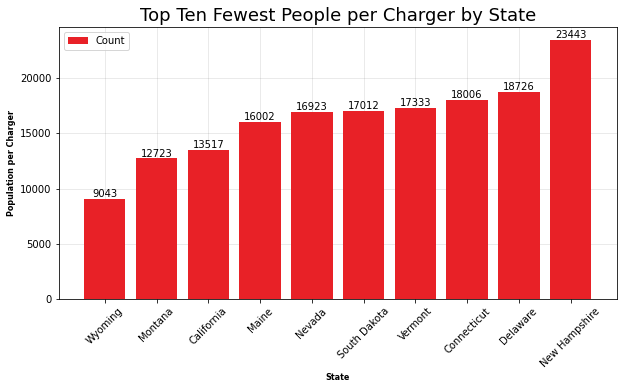

In [22]:
# Population 
top_ten_pop = state_counts.sort_values(by=['pop_per_charger'], ascending = True)[:10]

# get the data in a series for plotting
states = top_ten_pop.index.values.tolist() 
pop = top_ten_pop.pop_per_charger.values.tolist()

# plot it
bar_chart(states, pop, 'State', 'Population per Charger', 'Top Ten Fewest People per Charger by State', tesla_red)

# Tesla Supercharger Sites in the U.S.

Map the locations of each site in the U.S. Supercharger network. 

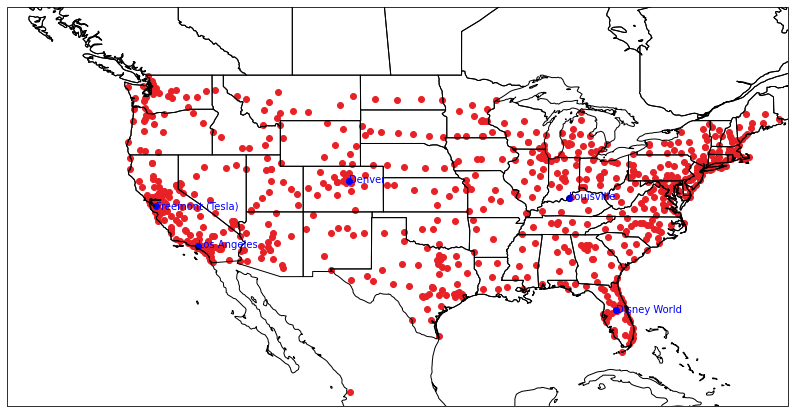

In [23]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

#ax.stock_img() # pretty map
ax.coastlines()
ax.add_feature(cfeature.STATES)

# map extents
extent = [-135, -66.5, 20, 55] # United States
#extent = [-90, -81, 35, 40] # Kentucky
ax.set_extent(extent, crs=ccrs.PlateCarree()) ## Important

# get ky chargers only
#ky_chargers = us_sites[us_sites.state_code == "KY"]

# add chargers
plt.scatter(us_sites.longitude, us_sites.latitude, color=tesla_red, alpha=1, transform=ccrs.PlateCarree(), zorder = 1)

# add the text of the location, not good for all sites too crowded
#for index, row in us_sites.iterrows():
    #lat = row['latitude']
    #lon = row['longitude']
    #name = row['common_name']
    #ax.text(lon, lat, name, transform=ccrs.PlateCarree())

# Add some cities in the US
cities = [
    {'name': 'Louisville', 'latitude': 38.2527, 'longitude': -85.7585},
    {'name': 'Los Angeles', 'latitude': 34.052235, 'longitude': -118.243683},
    {'name': 'Denver', 'latitude': 39.74204, 'longitude': -104.991531},
    {'name': 'Disney World', 'latitude': 28.418715, 'longitude': -81.581178},
    {'name': 'Freemont (Tesla)', 'latitude': 37.49257540505255, 'longitude': -121.94510996896852},
]

for city in cities:
    plt.scatter(city['longitude'], city['latitude'], color='blue', alpha=1, transform=ccrs.PlateCarree())
    ax.text(city['longitude'], city['latitude'] - 0.2, city['name'], color='blue', transform=ccrs.PlateCarree())

plt.show()

## The Model

Multiclass classification using the number of chargers bins (high, medium, low) as the outcome.

### Features


* state_code
* zip_code
* power
* zip_population
* average_income 
* state_population
* date_opened

### Notes From Pratik
One way could be to do a multi-class classification using the num_of_chargers as the outcome. Use the cut method on that variable to divide it into Low, High, Medium
Try appending population at zip level to provide some variance. Can also include household income, data on vehicle registrations if available, cost of living at zip level
Try ignoring open_soon as it could be a leaker and overfit the model but can use it to validate after the model is applied.

In [62]:
from sklearn.model_selection import train_test_split
# there were some NaNs for the average income at least
features_df = us_sites.dropna()

# X -> features, y -> label
# remove state_code, date_opened, power
X = features_df[['zip_code', 'power', 'zip_population', 'average_income', 'state_population']]
y = features_df['site_size']

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Scatter Matrix

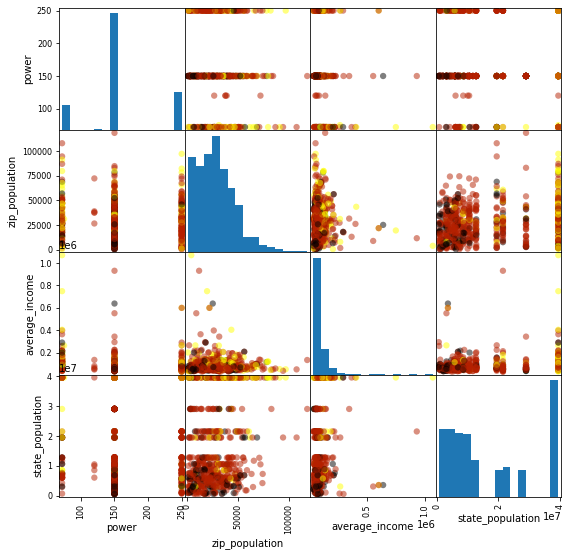

In [63]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

## Create classifier object

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

# train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Estimate the accuracy of the classifier on future data, using the test data

In [65]:
knn.score(X_test, y_test)

0.6697674418604651

In [66]:
# create function to lookup the labal for the site size. 
site_size_dict = {1 : 'Low', 2 : 'Medium', 3 : 'High'}

def lookup_site_size(site_size=99):
    return f'This site should have a {site_size_dict.get(site_size, "Unknown")} number of chargers.'

## Predict

In [67]:
# Use the model on new objects. The original dataset had upcoming charging 
# stations, but this did not include the zip code or the power rating. So it won't
# be very useful to predict. I will just make up my own examples

In [68]:
# this is just one in the training set, I need to make up some more examples
# zip_code, power, zip_population, average_income, state_population
# it should have picked low
site_prediction = knn.predict([[12817, 250.0, 1905.0, 60685.593220, 19453561.0]])
print(lookup_site_size(site_prediction[0]))

# example with high population
site_prediction = knn.predict([[90210, 250.0, 1905.0, 60685.593220, 19453561.0]])
print(lookup_site_size(site_prediction[0]))

# example with low population
site_prediction = knn.predict([[82009, 250.0, 1905.0, 34061.593220, 553561.0]])
print(lookup_site_size(site_prediction[0]))

# example with high income
site_prediction = knn.predict([[12817, 250.0, 1905.0, 260685.593220, 19453561.0]])
print(lookup_site_size(site_prediction[0]))

# example with low income
site_prediction = knn.predict([[12817, 250.0, 1905.0, 20685.593220, 19453561.0]])
print(lookup_site_size(site_prediction[0]))

This site should have a Medium number of chargers.
This site should have a Medium number of chargers.
This site should have a Medium number of chargers.
This site should have a Medium number of chargers.
This site should have a Medium number of chargers.


## Next Steps

These are just ideas of what you could do next. 

* Supercharger sites are primarily needed for interstate travel. It would be interesting to compare travel volume along the interstate with the installation of new sites.  
* The dataset contains predictions of new sites for 2021 and beyond. Analyze the number of new sites. 
* Get vehicle registration information from government sites

* Maps
  * Heat map of charger locations
  * Maps of existing and planned sites
  * Interactive maps with ability to show hide features such a supercharger vs destination charger or power levels

* Animation of the chargers by open date. 
  * plt.annotate could show all the dates as the plot refreshes

* Use other visualization Tools
  * Seaborn
  * dash (dashboard tool)
  * plotly

* Tableau
  * Use the data in other tools like Tableau. Tableau Public can publish the results so everyone can see them